Monthly demand for avionic system spares used in Boeing 707 aircraft is provided.

Analyse ACF and PACF graphs by taking lag = 12

Build an ARMA model based on the first 30 months of data and forecast the demand for spares for months 31 to 37.

Analyse the accuracy of the forecast

In [4]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
%matplotlib inline

In [5]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [6]:
import warnings
warnings.filterwarnings("ignore")

## correlation of lag=0 to 4

In [7]:
data = pd.read_csv('flightPartsDemand.csv', header=0)

In [8]:
data.head(5)

,Month,DemandForSpares
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


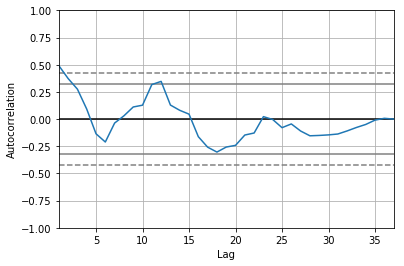

In [11]:
# autocorrelation plot of time series
autocorrelation_plot(data['DemandForSpares'])

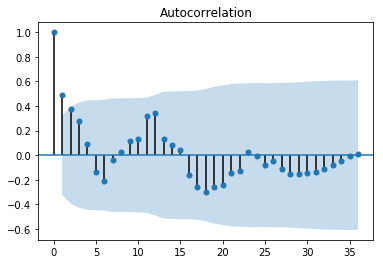

In [13]:
plot_acf(data['DemandForSpares'], lags=36)
pyplot.show()

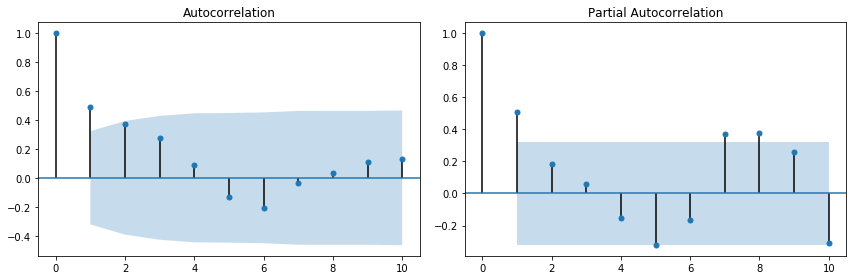

In [14]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(data['DemandForSpares'], lags=10, ax=axes[0])
smt.graphics.plot_pacf(data['DemandForSpares'], lags=10, ax=axes[1])
plt.tight_layout()

# autoregressive moving average model

In [15]:
data.shape

(37, 2)

In [25]:
# split dataset
X = data['DemandForSpares']
train, test = X[1:len(X)-7], X[len(X)-7:]

In [27]:
# train autoregression model
model = ARMA(train, (1,1))
#model_fit = model.fit(maxlag=1)
model_fit = model.fit()

In [28]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 1
Coefficients: const                    508.531541
ar.L1.DemandForSpares      0.741064
ma.L1.DemandForSpares     -0.339015
dtype: float64


In [29]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1 )

In [30]:
test.values[1]

688

In [31]:
predictions.values[1]

485.8279494199528

In [32]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions.values[i], test.values[i]))

predicted=477.895078, expected=503.000000
predicted=485.827949, expected=688.000000
predicted=491.706718, expected=602.000000
predicted=496.063264, expected=629.000000
predicted=499.291745, expected=823.000000
predicted=501.684257, expected=671.000000
predicted=503.457263, expected=487.000000


In [33]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 171.158


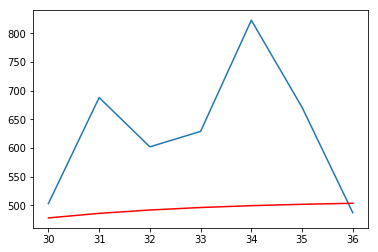

In [34]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()